# 1. Logistic Regression for Binary Classification (2 points)

In softmax regression, the model's output probabilities are given by

$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y = \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

1. Show that this parametrization has a spurious degree of freedom. That is, show that both $\mathbf{o}$ and $\mathbf{o} + c$ with $c \in \mathbb{R}$ lead to the same probability estimate.

2. For binary classification, i.e. whenever we have only two classes $\{-1, 1\}$, we can arbitrarily set $o_{-1} = 0$. Using the shorthand $o = o_1$ show that this is equivalent to

$$p(y=1|o) = \frac{1}{1 + \exp(-o)}$$

3. Show that the log-likelihood loss (often called logistic loss) for labels $y \in \{-1, 1\}$ is thus given by

$$-\log p(y|o) = \log (1 + \exp(-y \cdot o))$$

4. Show that for $y = 1$ the logistic loss asymptotes to $0$ for $o \to \infty$ and to $\infty$ for $o \to -\infty$.

Answers:

1. Show that  $p(y|o) = p(y|o+c), o \in \mathbb{R}^n, c \in \mathbb{R}$. This is equivalent to showing that $\forall i$, $softmax(o)_i = softmax(o+c)_i$.

$$softmax(o+c)_i = \frac{\exp(o_i+c)}{\sum_{j=1}^n\exp(o_j+c)}$$
$$ = \frac{exp^(o_i)\exp(c)}{\exp(c)\sum_{j=1}^n\exp(o_j)}$$
$$ = \frac{exp^(o_i)}{\sum_{j=1}^n\exp(o_j)}$$
$$ = softmax(o)_i$$

2. Show that $p(y=1|o) = \frac{1}{1 + \exp(-o)}$. Let $o_{-1} = 0, o_1 = o$

From the question,
$$p(y|\mathbf{o}) = \mathrm{softmax}(\mathbf{o})_y= \frac{\exp(o_y)}{\sum_{y'} \exp(o_{y'})}$$

Then, letting $o_{-1} = 0, o_1 = o$

$$p(y=1|o) = softmax(o) = \frac{\exp(o)}{\exp(o)+\exp(0)}$$
$$ = \frac{\exp(o)}{\exp(o)+1}$$
$$ = \frac{1}{1+\exp(-o)}$$

3. The log likelihood loss is given by $$l(y, \hat{y}) = - \sum_{i \in \{-1, 1\}}p(y_i)log(\hat{y}_i)$$
Subbing in $o$, we get:
$$l(y, o) = - \sum_{i \in \{-1, 1\}}p(y_i)\log(p(y_i|o))$$
When $y=1$, we have:
$$l(y, o) = -\log(p(y=1|o))$$
From (1.2),
$$= -\log(\frac{1}{1+\exp(-o)}) = \log(1+\exp(-o))$$


For $y = -1$, since $o_{-1}=0$:
$$l(y, o) = -\log(p(y=-1|o))$$
Using the softmax function,
$$= -\log(\frac{1}{1+\exp(o)}) = \log(1+\exp(o))$$

Clearly, this generalizes to the function:

$$l(y, o) = -p(y|o) =  \log(1+\exp(o))$$





4. From Part 3, the logistic loss when $y = 1$ is given by: $-\log p(y|o) = \log (1 + \exp( -o))$

$$\lim_{o->\infty}\log (1 + \exp(-o))$$
As $o$ approaches $\infty$, $(1+\exp(-o))$ approaches 1. Therefore, $\log(1+\exp(-o))$ approaches 0. This is because $log(1) = 0$. So,
$$\lim_{o->\infty}\log (1 + \exp(- o)) = 0$$




Now, when o approaches $-\infty$,

$$\lim_{o->-\infty}\log (1 + \exp(-o))$$
As $o$ approaches $-\infty$, $(1+\exp(-o))$ approaches $\infty$. Therefore, $\log(1+\exp(-o))$ approaches $\infty$ as well, since $log(x)$ approaches $\infty$ as x approaches $\infty$. So,
$$\lim_{o->-\infty}\log (1 + \exp(-o)) = \infty$$

# 2. Implementing the logistic loss (1.5 points)

1. Implement the binary logistic loss $l(y,o) = \log (1 + \exp(-y \cdot o))$ in numpy.
1. Plot its values for $y \in \{-1, 1\}$ over the range of $o \in [-5, 5]$.
1. Derive the derivative of $l(y,o)$ and show your work. Then, in a new plot, plot derivative of $l(y,o)$ with respect to $o$ for $y \in \{-1, 1\}$ and for $o \in [-5, 5]$ without using any automatic differentiation software (e.g. Pytorch, TensorFlow, JAX, etc.).
1. In a new plot, plot $l(y,o)$ with $y = 1$ and $o ∈ [-1000, 1000]$. What happens for large positive and large negative values of $o$? Why?

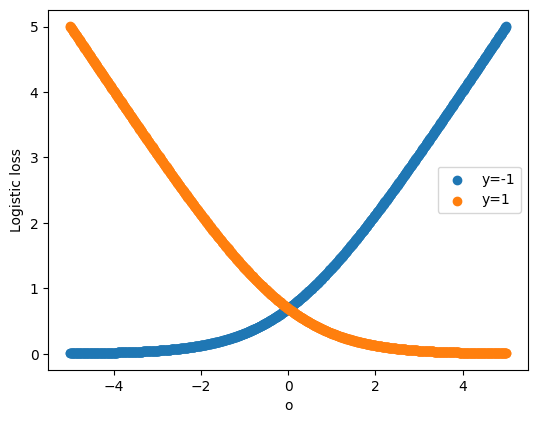

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Implement the binary logistic loss
def logistic_loss(y, o):
  return np.log(1+np.exp(-y*o))

## 2. Plot its values for
y = np.array([[-1],[1]])
o = np.linspace(-5,5,1000)

losses = logistic_loss(y,o)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])

plt.scatter(o, losses[0], label="y=-1")
plt.scatter(o, losses[1], label="y=1")
plt.xlabel("o")
plt.ylabel("Logistic loss")
plt.legend()
plt.show()

3. Find derivative of $l(y, o)$

Use the chain rule. Let $l(w) = \log(1+w)$ and $w=\exp(-yo)$. Then,

$$\frac{\partial l(y,o)}{\partial o} = \frac{d l(w)}{d w} \frac{\partial w}{\partial o} $$

$$\frac{d l(w)}{dw} = \frac{1}{1+w}$$

$$\frac{\partial w}{\partial o} = -y\exp(-yo)$$

So,

$$\frac{\partial l(y,o)}{\partial o} = \frac{-y\exp(-yo)}{1+ \exp(-yo)} = \frac{-y}{1+\exp(yo)}$$


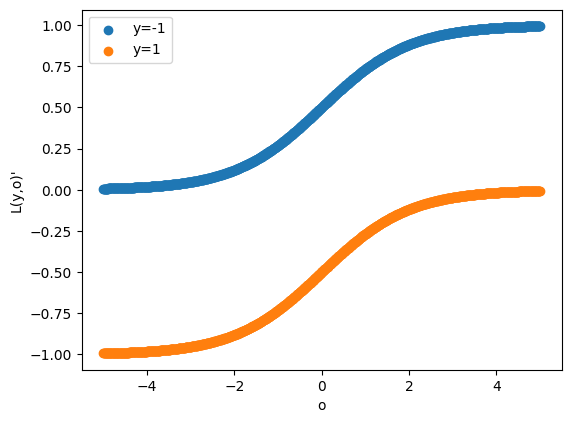

In [3]:
## 3. Plot derivative of loss function

def loss_derivative(y,o):
  derivs = -y/(1+np.exp(y*o))
  return derivs

loss_derivs = loss_derivative(y,o)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])

plt.scatter(o, loss_derivs[0], label="y=-1")
plt.scatter(o, loss_derivs[1], label="y=1")
plt.xlabel("o")
plt.ylabel("L(y,o)'")
plt.legend()
plt.show()

<ipython-input-2-65f45cc45d21>:6: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(-y*o))


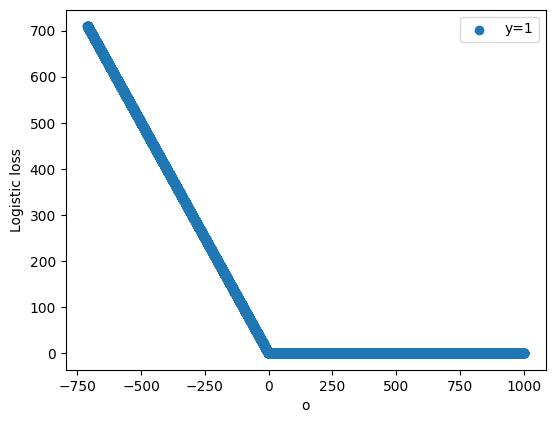

In [4]:
## 4.

o = np.linspace(-1000,1000, 20000)
new_losses = logistic_loss(1, o)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])

plt.scatter(o, new_losses, label="y=1")
plt.xlabel("o")
plt.ylabel("Logistic loss")
plt.legend()
plt.show()

Answer to part 4: What happens for large positive and large negative values of  o? Why?

For very large positive values of o, the value of the loss approaches zero, as we saw in Question 1 Part 4.

For very large negative values of o, the logistic loss approaches infinity, as we showed in Question 1 Part 4. However, since in the logistic loss formula we are taking exponents of -o, which grows to large positive numbers, there is an overflow error as exp(-o) becomes to large to fit in 64 bits.

# 3. Implementing logistic regression (1.5 points)

Implement a basic logistic regression model and fit it to the data from the new `generate_data` function (below) using gradient descent.
Your model should take the form `o = m*x + b`, where `o` is the output (logits), `x` is the input, `m` is a weight parameter, and `b` is a bias parameter.
Train the model using the logistic loss function you derived in the previous problem.
You must use only `numpy` and derive any derivatives yourself (i.e. no autograd from TensorFlow, MXNet, Pytorch, JAX etc!).
Print out or plot the loss over the course of training.
You should be able to get a loss that is close to zero by the end of training - make sure you achieve this and **explain why**.

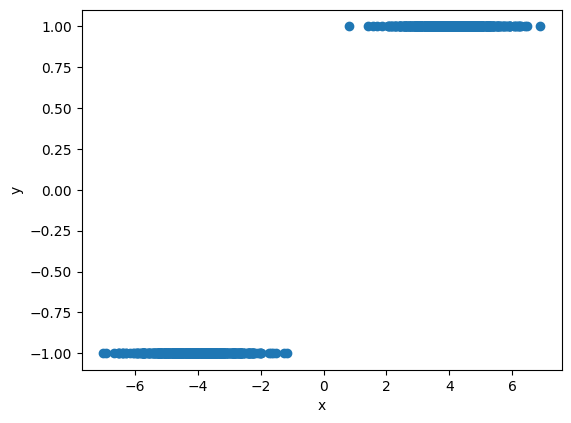

In [5]:
## First, visualize the data

import numpy as np

def generate_data():
    size = 1000
    rng = np.random.default_rng(seed=0)
    y = 2*rng.integers(0, 2, size) - 1
    x = rng.standard_normal((1000,)) + 4*y
    return x, y

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])

plt.scatter(generate_data()[0], generate_data()[1])
plt.xlabel("x")
plt.ylabel("y")
plt.show()



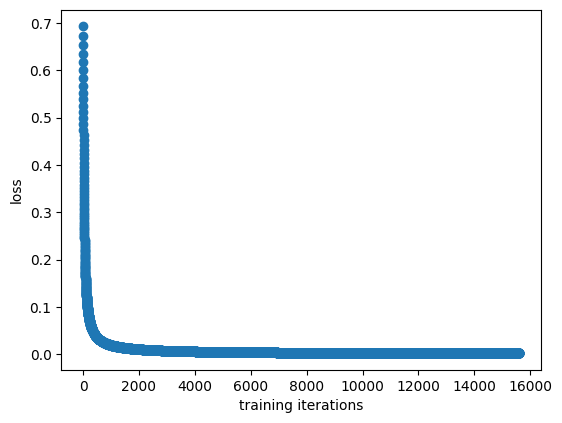

In [6]:
## Create the model
class LogReg:
  def __init__(self, X, y, m=0, b=0):
    self.losses = []
    self.X = X
    self.y = y
    self.m = m
    self.b = b


  def model(self):
    return self.m*self.X + self.b

  ## taken from previous question
  def log_loss(self, o):
    return np.log(1+np.exp(-self.y*o)).mean()

  ## taken from previous question
  def loss_deriv(self,o):
    derivs = -self.y/(1+np.exp(self.y*o))
    return derivs

  def SGD(self, o, lr):
    db = np.mean(self.loss_deriv(o))
    dm = np.mean(self.loss_deriv(o)*self.X)
    self.m -= lr*dm
    self.b -= lr*db

  def train(self, lr):
    i = 0
    while True:
      o = self.model()
      loss = self.log_loss(o)
      self.losses.append(loss)
      self.SGD(o, lr)
      i += 1
      if i>10:
        # Once the loss has stopped decreasing meaningfully, stop training
        if (self.losses[i-1] + 0.000001) > self.losses[i-11]:
          return o

logregmodel = LogReg(generate_data()[0], generate_data()[1])
y_model = logregmodel.train(0.005)
# Plot our train loss. It appears to converge at a MSE of around 5.1


fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6])

plt.xlabel("training iterations")
plt.ylabel("loss")

plt.scatter(range(len(logregmodel.losses)), logregmodel.losses)
plt.show()

In [7]:
print("Value of w: ", logregmodel.m)
print("Value of b: ", logregmodel.b)
print("Final Loss: ", logregmodel.losses[-1])

Value of w:  1.974867106219028
Value of b:  0.017938775884118126
Final Loss:  0.0019830735606383614


As seen in the above plot, the error does apporach zero. This is because looking at a visualization of the data (plotted above), it is clear that the data is linearly seperable - with all inputs of x<0 belonging to the class -1, and all inputs of x>0 belonging to the class +1.
Therefore, if we continue to train the model, the value of m (or w) can become arbitrarily large, so that during the linear regression step, we map positive numbers to very large positive values of o, and negative numbers to very large negative values of o. In either case, this causes the loss function (as defined in 1.3) to approach zero. However, the loss function can never reach zero, as $\log (1 + \exp(-y \cdot o)) > 0$ for all possible $y, o$.